In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = np.loadtxt("energy_vs_distance.txt")


In [31]:

# Split into columns
distance = data[:, 0]       # x-position of 2nd atom
energy = data[:, 1]  # potential energy
min_index = np.argmin(energy)
# Compute actual distance between atoms (first atom at x=5)
r_eq = distance[min_index]
valid = (distance > 0) & (~np.isnan(energy))

distance_valid = distance[valid]
energy_valid = energy[valid]

# Find index of minimum energy in valid data
min_index = np.argmin(energy_valid)

r_eq = distance_valid[min_index]
min_energy = energy_valid[min_index]

print(f"Equilibrium distance (r_eq): {r_eq} Å")
print(f"Minimum potential energy: {min_energy} eV")


Equilibrium distance (r_eq): 1.0 Å
Minimum potential energy: 45.209458 eV


In [33]:
zero_indices = np.where(energy == 0)[0]
r_cut = distance[zero_indices[0]] if len(zero_indices) > 0 else None

# Print
print(f"Equilibrium distance (r_eq): {r_eq:.3f} Å")
print(f"Minimum potential energy: {min_energy:.4f} eV")
if r_cut:
    print(f"Cutoff distance (r_cut): {r_cut:.3f} Å")
else:
    print("r_cut not found — potential never becomes exactly zero.")

Equilibrium distance (r_eq): 1.000 Å
Minimum potential energy: 45.2095 eV
r_cut not found — potential never becomes exactly zero.


TypeError: unsupported format string passed to NoneType.__format__

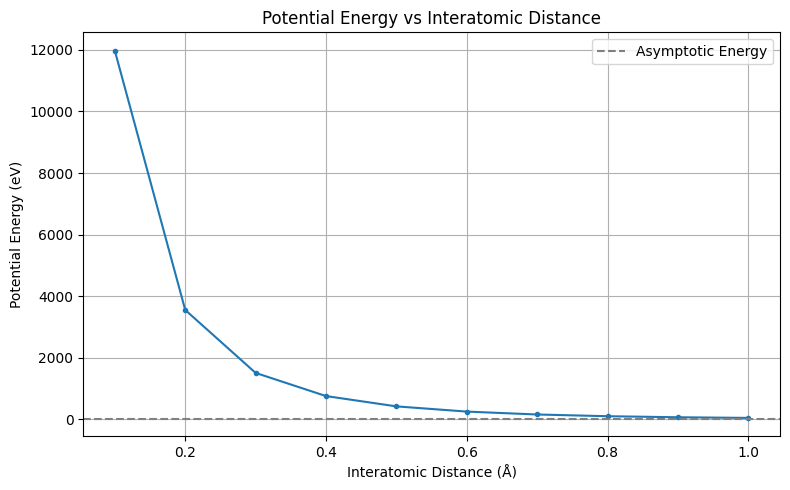

In [34]:

# Plotsavefig
plt.figure(figsize=(8, 5))
plt.plot(distance, energy, marker='.', linestyle='-')
plt.axhline(y=-1.5237562, color='gray', linestyle='--', label='Asymptotic Energy')
plt.xlabel('Interatomic Distance (Å)')
plt.ylabel('Potential Energy (eV)')
plt.title('Potential Energy vs Interatomic Distance')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.axvline(x=r_eq, color='red', linestyle='--', label=f'Equilibrium distance rcut = {r_cut:.2f} Å')
plt.legend()
#plt.savefig("potential_vs_distance.png", dpi=300)
plt.show()
